In [235]:
import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [236]:
start = datetime.datetime(2022,1,1)
end = datetime.datetime.today()

In [237]:
google = pdr.DataReader('GOOGL', 'yahoo', start, end)
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,146.698502,144.852005,146.050003,144.852005,18136000.0,144.852005
2022-01-03,145.850998,143.712997,145.054993,144.991501,28646000.0,144.991501
2022-01-04,146.485001,143.716507,145.395996,144.399506,28400000.0,144.399506
2022-01-05,144.499496,137.688004,144.419998,137.774994,54618000.0,137.774994
2022-01-06,139.940002,136.558502,136.998505,137.747498,37348000.0,137.747498
...,...,...,...,...,...,...
2022-12-06,99.779999,96.419998,99.300003,96.980003,24910700.0,96.980003
2022-12-07,96.879997,94.720001,96.410004,94.940002,31045400.0,94.940002
2022-12-08,95.580002,93.449997,95.379997,93.709999,32213300.0,93.709999


Text(0, 0.5, 'Stock Price')

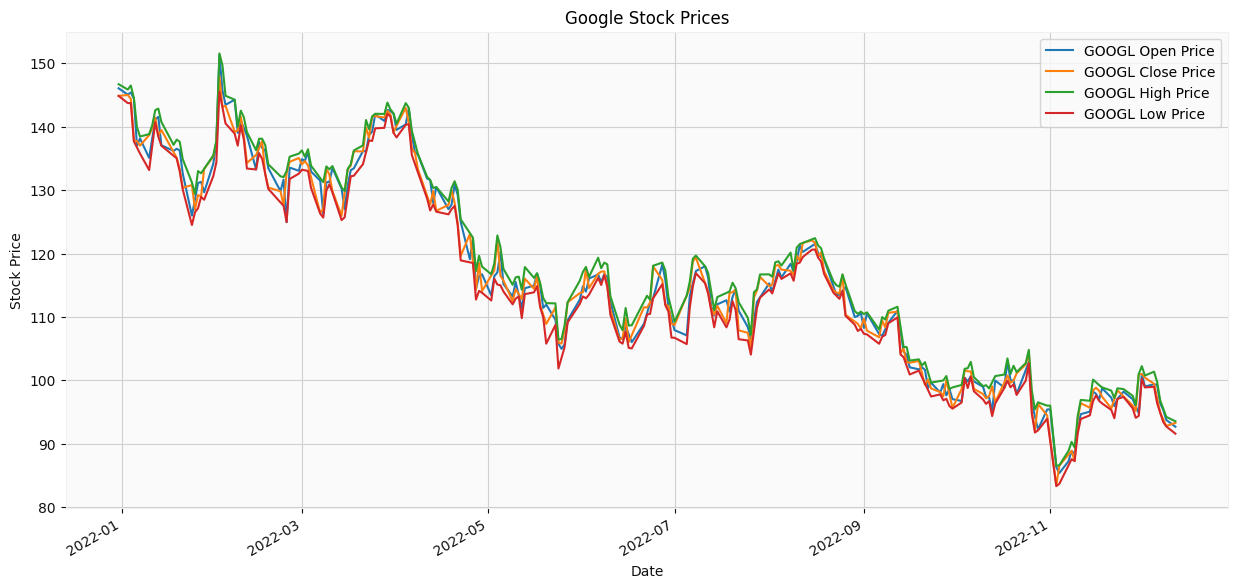

In [238]:
google['Open'].plot(label= 'GOOGL Open Price', figsize=(15,7))
google['Close'].plot(label= 'GOOGL Close Price')
google['High'].plot(label= 'GOOGL High Price')
google['Low'].plot(label= 'GOOGL Low Price')
plt.legend()
plt.title('Google Stock Prices')
plt.ylabel('Stock Price')

Text(0.5, 1.0, 'Volume Traded')

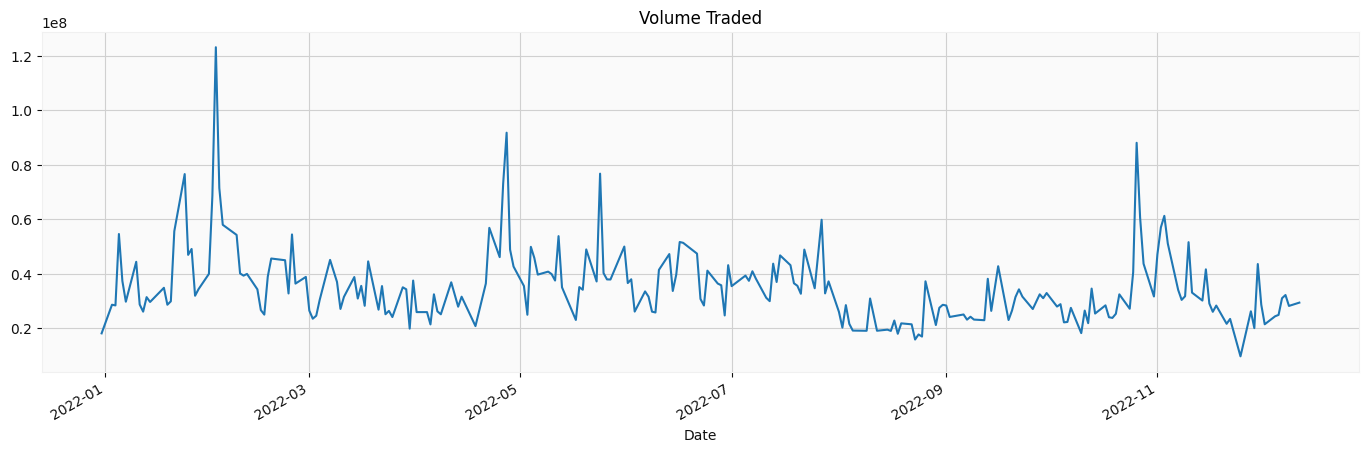

In [239]:
google['Volume'].plot(figsize=(17,5))
plt.title('Volume Traded')

In [240]:
tesla = pdr.DataReader('TSLA', 'yahoo', start, end)
gm = pdr.DataReader('GM', 'yahoo', start, end)
ford = pdr.DataReader('F', 'yahoo', start, end)

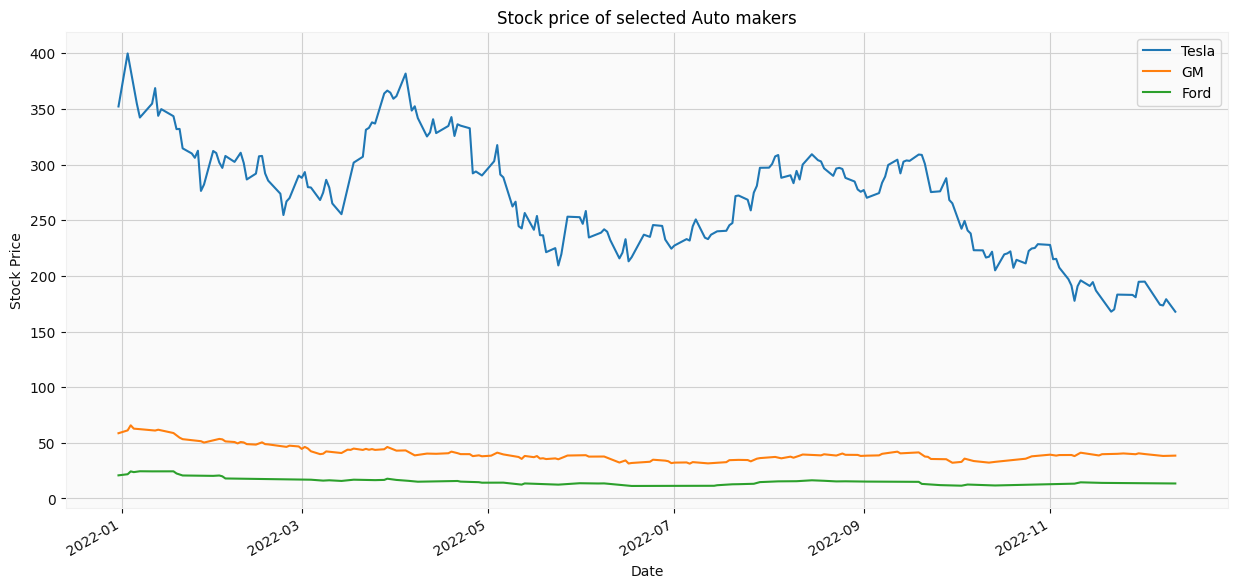

In [241]:
tesla['Close'].plot(label="Tesla",figsize=(15,7))
gm['Close'].plot(label="GM")
ford['Close'].plot(label="Ford")
plt.ylabel('Stock Price')
plt.title("Stock price of selected Auto makers")
plt.legend()

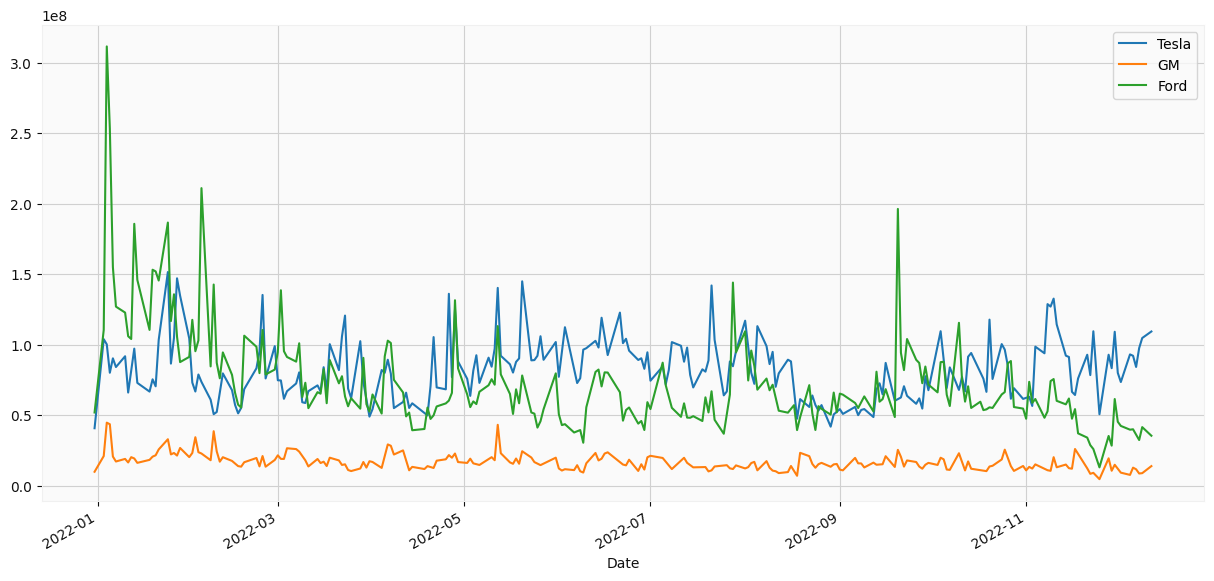

In [242]:
tesla['Volume'].plot(figsize=(15,7), label='Tesla')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend()

<AxesSubplot: xlabel='Date'>

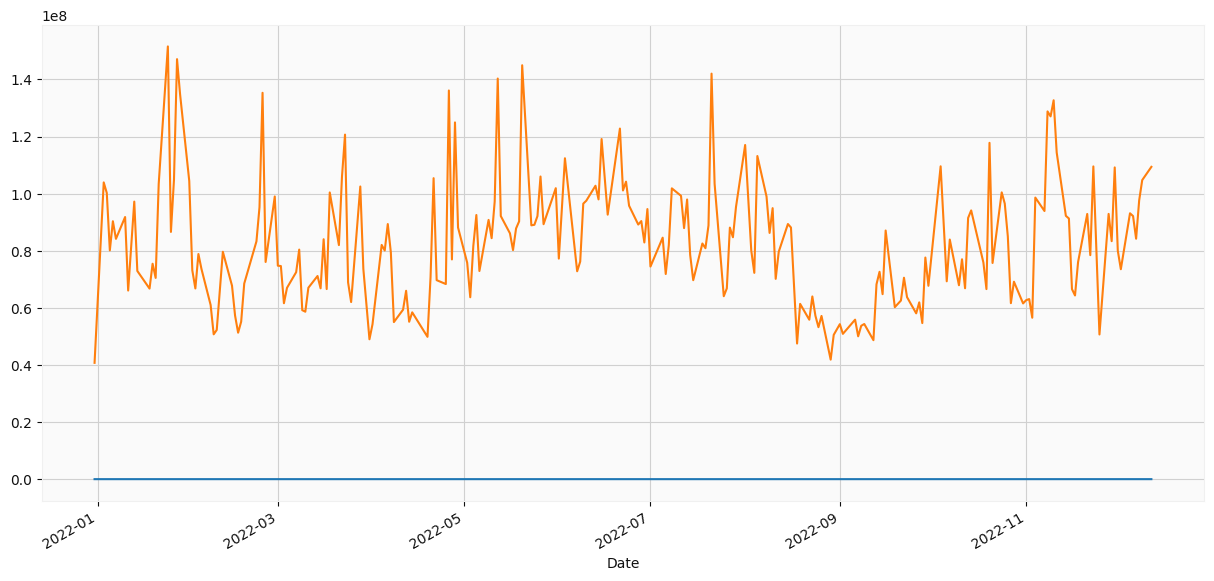

In [243]:
# TODO
# My idea Overlay stock price with volume; Expectation: High Volume = Big change in price
tesla['Close'].plot(figsize=(15,7), label='Tesla Price')
tesla['Volume'].plot(label='Tesla Volume')

In [244]:
# TODO Market cap
tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,360.666656,351.529999,357.813324,352.260010,40733700.0,352.260010
2022-01-03,400.356659,378.679993,382.583344,399.926666,103931400.0,399.926666
2022-01-04,402.666656,374.350006,396.516663,383.196655,100248300.0,383.196655
2022-01-05,390.113342,360.336670,382.216675,362.706665,80119800.0,362.706665
2022-01-06,362.666656,340.166656,359.000000,354.899994,90336600.0,354.899994
...,...,...,...,...,...,...
2022-12-06,183.649994,175.330002,181.220001,179.820007,92150800.0,179.820007
2022-12-07,179.380005,172.220001,175.029999,174.039993,84213300.0,174.039993
2022-12-08,175.199997,169.059998,172.199997,173.440002,97624500.0,173.440002


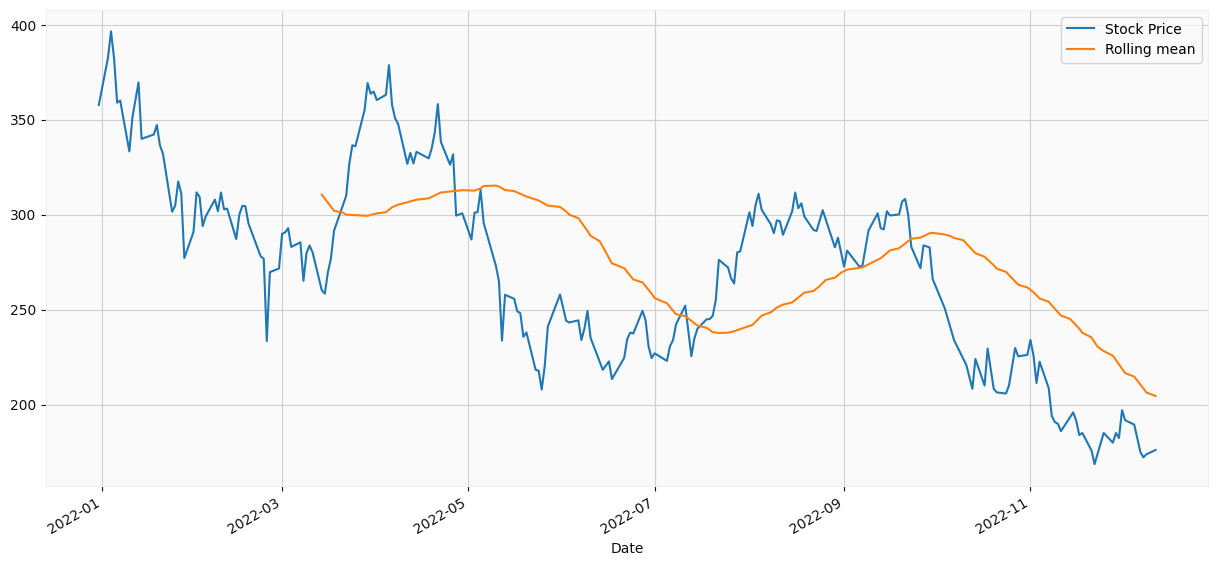

In [245]:
tesla['Open'].plot(figsize=(15,7), label="Stock Price")
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA50'].plot(label='Rolling mean')
plt.legend()

In [246]:
import pandas as pd
from pandas.plotting import scatter_matrix

In [247]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

array([[<AxesSubplot: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot: xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot: xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

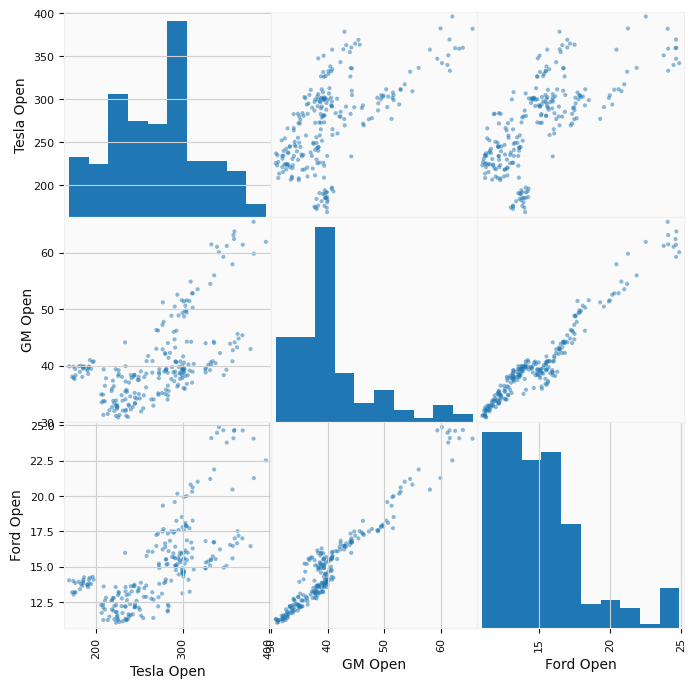

In [248]:
scatter_matrix(car_comp, figsize=(8,8))
# Helpful at pinpointing correlelations

In [249]:
import mplfinance as mpf
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator, DayLocator, MONDAY

In [250]:
fordJan = ford.loc['2022-01':'2022-01']
fordJan

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,21.879999,21.059999,21.270000,21.770000,110449000.0,21.082655
2022-01-04,24.559999,22.420000,22.520000,24.309999,311645200.0,23.542458
2022-01-05,24.950001,23.469999,24.059999,23.660000,253540000.0,22.912979
2022-01-06,24.620001,23.360001,24.090000,24.459999,155058800.0,23.687721
2022-01-07,24.910000,24.040001,24.670000,24.440001,127017500.0,23.668352
2022-01-10,24.440001,23.350000,24.100000,23.850000,122800700.0,23.096983
2022-01-11,24.350000,23.280001,23.780001,24.350000,106011600.0,23.581198
2022-01-12,24.840000,24.010000,24.610001,24.469999,104050000.0,23.697407
2022-01-13,25.870001,24.370001,24.639999,25.020000,185780500.0,24.230043


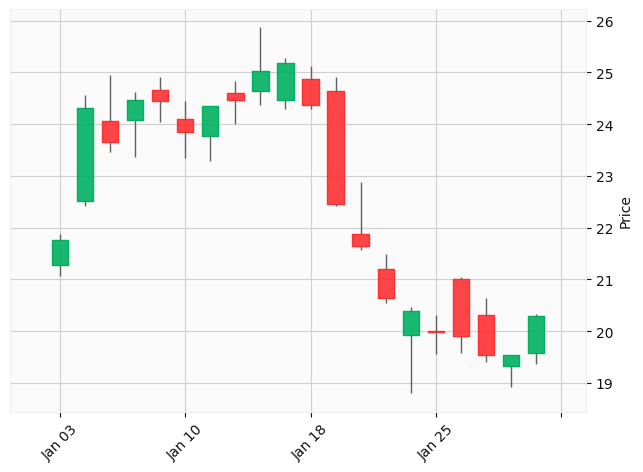

In [251]:
#ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date:date2num(date))
#ford_values = [tuple(vals) for vals in ford_reset[['date_ax','Open','High','Low','Close']]]

#mondays = WeekdayLocator(MONDAY)
#alldays = DayLocator()
#weekFormatter = DateFormatter('%b %d')
#dayFormatter = DateFormatter('%d')


mpf.plot(fordJan, type='candle', style="yahoo")

## Daily percentage change

- r(t) = (p(t)/p(t-1)) - 1

In [252]:
tesla['Daily Returns'] = (tesla['Close']/tesla['Close'].shift(1)) - 1
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,MA50,Daily Returns
Date,,,,,,,,
2021-12-31,360.666656,351.529999,357.813324,352.260010,40733700.0,352.260010,NaN,NaN
2022-01-03,400.356659,378.679993,382.583344,399.926666,103931400.0,399.926666,NaN,0.135317
2022-01-04,402.666656,374.350006,396.516663,383.196655,100248300.0,383.196655,NaN,-0.041833
2022-01-05,390.113342,360.336670,382.216675,362.706665,80119800.0,362.706665,NaN,-0.053471
2022-01-06,362.666656,340.166656,359.000000,354.899994,90336600.0,354.899994,NaN,-0.021523


<AxesSubplot: >

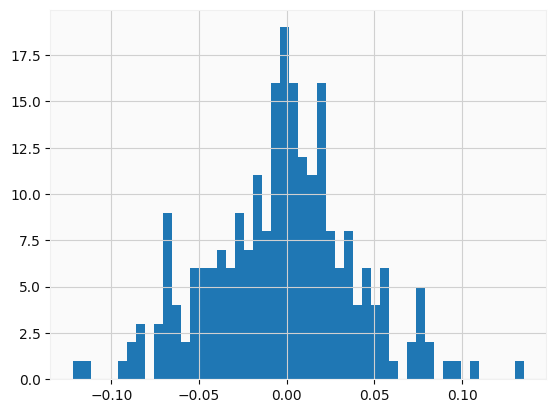

In [253]:
tesla['Daily Returns'].hist(bins=50)

In [254]:
gm['Daily Returns'] = (gm['Close']/gm['Close'].shift(1)) - 1
ford['Daily Returns'] = (ford['Close']/ford['Close'].shift(1)) - 1

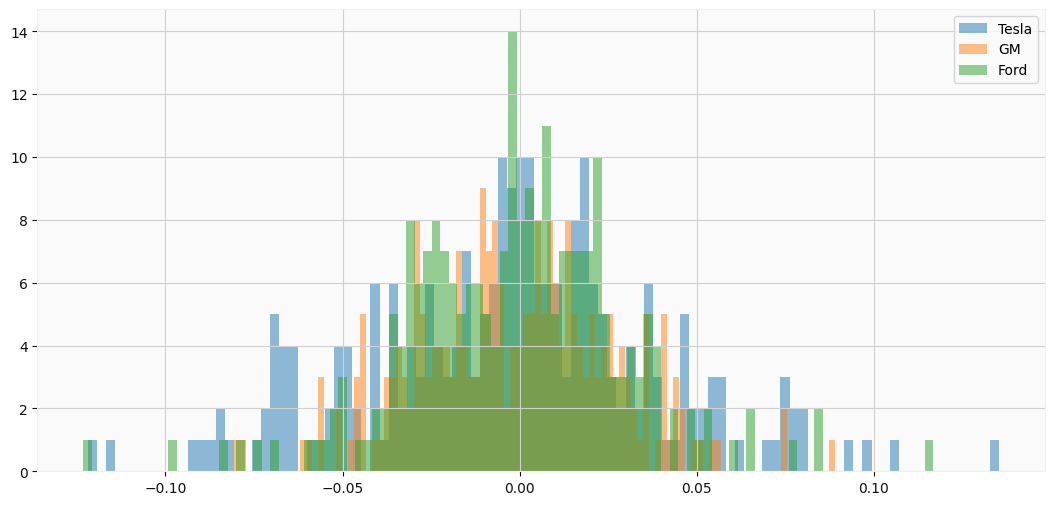

In [255]:
tesla['Daily Returns'].hist(bins=100, label='Tesla',alpha=0.5,figsize=(13,6))
gm['Daily Returns'].hist(bins=100, label='GM',alpha=0.5)
ford['Daily Returns'].hist(bins=100, label='Ford',alpha=0.5)
plt.legend()

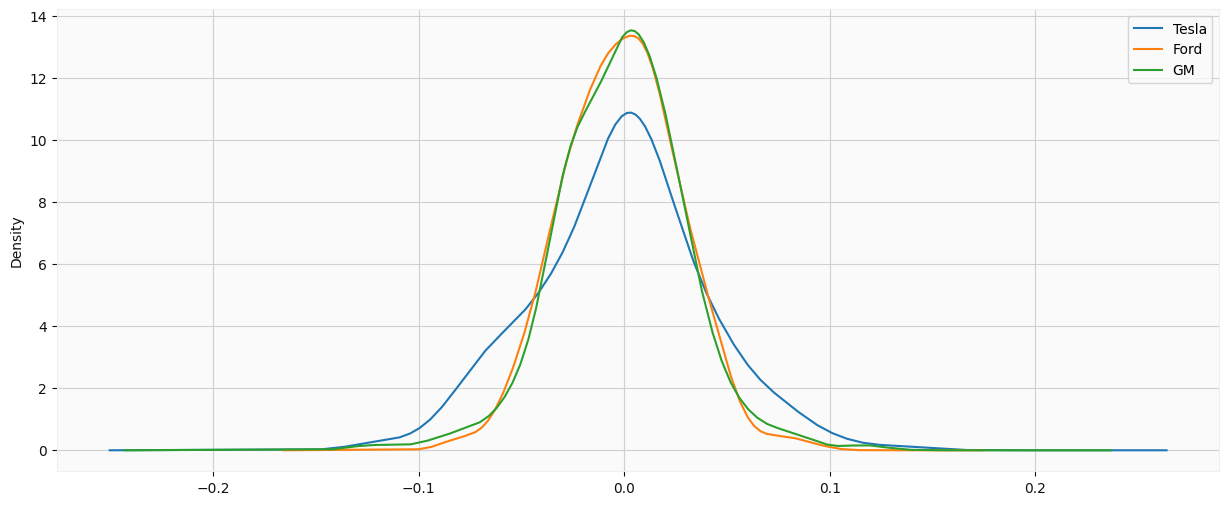

In [256]:
# kernel density estimation
tesla['Daily Returns'].plot(kind='kde', label='Tesla', figsize=(15,6))
gm['Daily Returns'].plot(kind='kde', label='Ford')
ford['Daily Returns'].plot(kind='kde', label='GM')
plt.legend()

<AxesSubplot: >

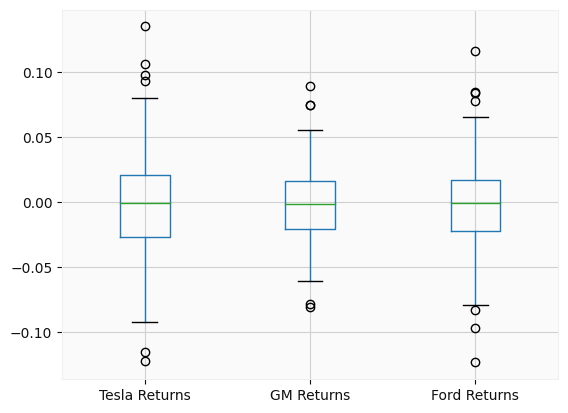

In [257]:
box_df = pd.concat([tesla['Daily Returns'], gm['Daily Returns'], ford['Daily Returns']], axis=1)
box_df.columns=['Tesla Returns', 'GM Returns', 'Ford Returns']
box_df.boxplot()


[Text(0, 2.0887289685215062, '-0.1'),
 Text(0, 5.7829572573786985, '-0.05'),
 Text(0, 9.477185546235892, '0.0'),
 Text(0, 13.171413835093082, '0.05'),
 Text(0, 16.865642123950273, '0.1')]

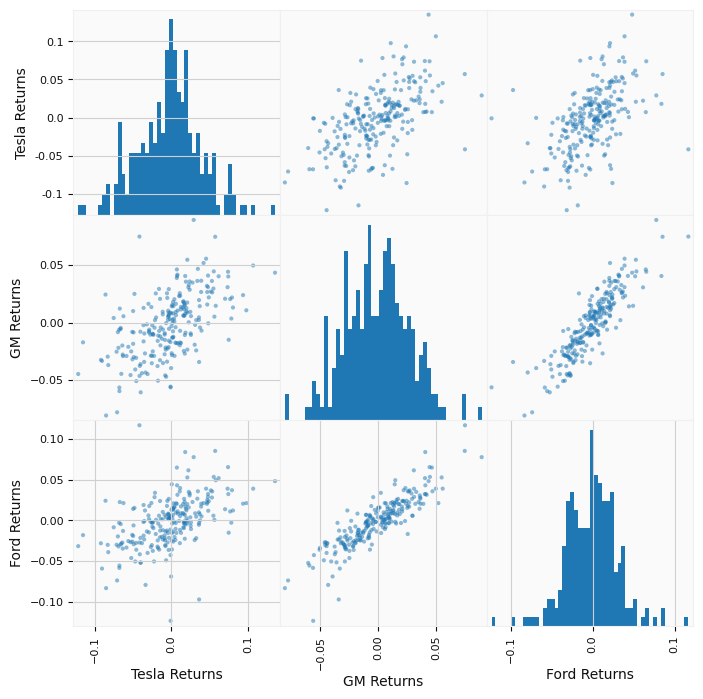

In [258]:
axes = scatter_matrix(box_df,figsize=(8,8),hist_kwds={'bins':50},alpha=0.5)
new_labels = [round(float(i.get_text()), 2) for i in axes[0,0].get_yticklabels()]
axes[0,0].set_yticklabels(new_labels)

## Cumulative returns

In [259]:
tesla['Cumulative Return'] = (1 + tesla['Daily Returns']).cumprod()
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,MA50,Daily Returns,Cumulative Return
Date,,,,,,,,,
2021-12-31,360.666656,351.529999,357.813324,352.260010,40733700.0,352.260010,NaN,NaN,NaN
2022-01-03,400.356659,378.679993,382.583344,399.926666,103931400.0,399.926666,NaN,0.135317,1.135317
2022-01-04,402.666656,374.350006,396.516663,383.196655,100248300.0,383.196655,NaN,-0.041833,1.087823
2022-01-05,390.113342,360.336670,382.216675,362.706665,80119800.0,362.706665,NaN,-0.053471,1.029656
2022-01-06,362.666656,340.166656,359.000000,354.899994,90336600.0,354.899994,NaN,-0.021523,1.007494


In [260]:
gm['Cumulative Return'] = (1 + gm['Daily Returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['Daily Returns']).cumprod()

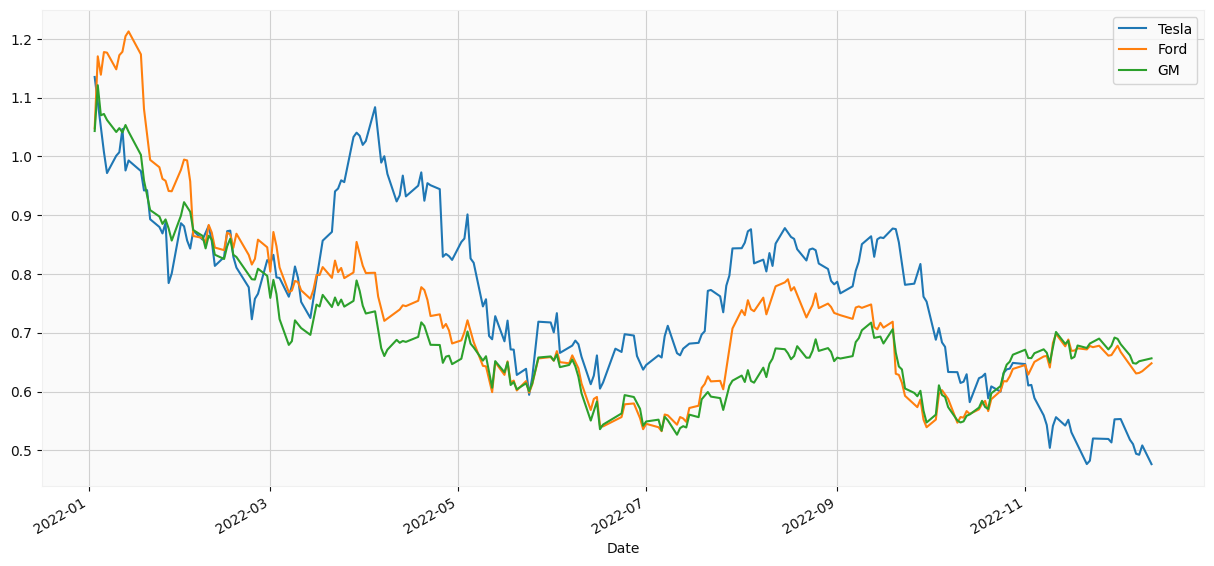

In [261]:
tesla['Cumulative Return'].plot(label='Tesla', figsize=(15,7))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()